In [1]:
import numpy as np
import xarray as xr
from dask.diagnostics import ProgressBar
import os.path as op
import xrft
import xgcm
from xmitgcm import open_mdsdataset
from MITgcmutils import jmd95
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ddir = '/tank/chaocean/'

In [3]:
ds = open_mdsdataset(op.join(ddir,'qjamet/RUNS/ORAR/ensmean/run2012'), 
                     grid_dir = op.join(ddir,'grid_chaO/gridMIT_update1/'),
                     prefix = ['diag_ocnTave'], delta_t = 2e2)
ds

/tank/users/tuchida/miniconda3/envs/ensemble/lib/python3.7/site-packages/xmitgcm/mds_store.py:837: UserWarning: Couldn't find available_diagnostics.log in /tank/chaocean/qjamet/RUNS/ORAR/ensmean/run2012 or /tank/chaocean/grid_chaO/gridMIT_update1/. Using default version.
  "in %s or %s. Using default version." % (data_dir, grid_dir))
/tank/users/tuchida/miniconda3/envs/ensemble/lib/python3.7/site-packages/xmitgcm/mds_store.py:217: FutureWarning: In xarray version 0.15 `auto_combine` will be deprecated. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi
  ds = xr.auto_combine(datasets)
/tank/users/tuchida/miniconda3/envs/ensemble/lib/python3.7/site-packages/xmitgcm/mds_store.py:217: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order

<xarray.Dataset>
Dimensions:  (XC: 1000, XG: 1000, YC: 900, YG: 900, Z: 46, Zl: 46, Zp1: 47, Zu: 46, time: 73)
Coordinates:
  * XC       (XC) >f4 262.00003 262.0861 262.17215 ... 347.88644 347.9725
  * YC       (YC) >f4 -19.916634 -19.8333 -19.749968 ... 54.916702 55.000034
  * XG       (XG) >f4 261.957 262.04306 262.12912 ... 347.8434 347.92947
  * YG       (YG) >f4 -19.9583 -19.874968 -19.791634 ... 54.875034 54.95837
  * Z        (Z) >f4 -3.0467727 -9.454049 -16.363966 ... -5624.9517 -5875.141
  * Zp1      (Zp1) >f4 0.0 -6.0935454 -12.814552 ... -5749.9097 -6000.3726
  * Zu       (Zu) >f4 -6.0935454 -12.814552 -19.91338 ... -5749.9097 -6000.3726
  * Zl       (Zl) >f4 0.0 -6.0935454 -12.814552 ... -5499.9937 -5749.9097
    rA       (YC, XC) >f4 dask.array<chunksize=(900, 1000), meta=np.ndarray>
    dxG      (YG, XC) >f4 dask.array<chunksize=(900, 1000), meta=np.ndarray>
    dyG      (YC, XG) >f4 dask.array<chunksize=(900, 1000), meta=np.ndarray>
    Depth    (YC, XC) >f4 dask.array<c

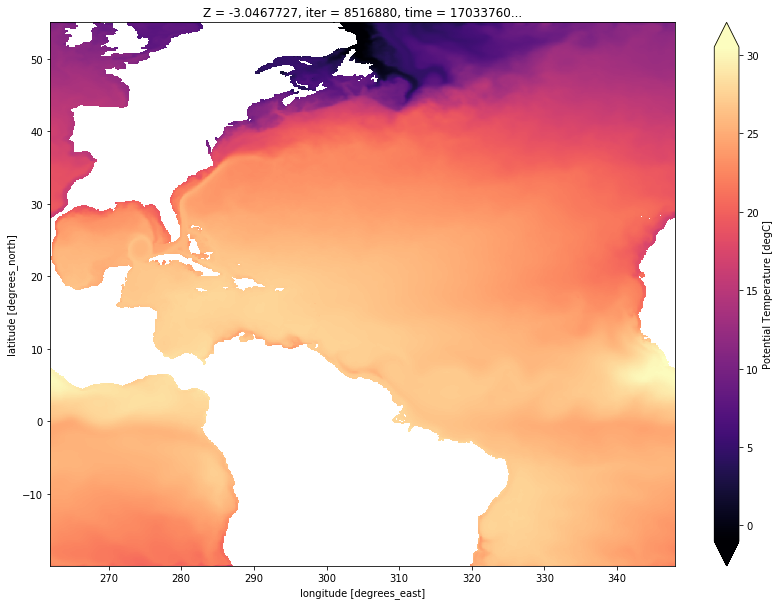

In [4]:
ds.THETA[0,0].where(ds.maskC[0]!=0.).plot(figsize=(14,10), cmap='magma', vmin=-1, vmax=30.5)

In [42]:
with ProgressBar():
    sig20 = xr.apply_ufunc(jmd95.densjmd95, ds.SALT[0].load(), ds.THETA[0].load(), 2e3).compute() - 1e3
    sig2s = xr.apply_ufunc(jmd95.densjmd95, ds.SALT[:,0].load(), ds.THETA[:,0].load(), 2e3).compute() - 1e3
sig20

[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  3.3s
[########################################] | 100% Completed |  3.6s


<xarray.DataArray (Z: 46, YC: 900, XC: 1000)>
array([[[33.82438743, 33.83441073, 33.84539731, ..., 33.8013674 ,
         33.80769916, 33.81536499],
        [33.78880884, 33.79122111, 33.79453414, ..., 33.7870904 ,
         33.78698427, 33.78741113],
        [33.71685915, 33.7092725 , 33.70257752, ..., 33.74232915,
         33.73416261, 33.72531437],
        ...,
        [35.7802856 , 35.79359688, 35.81336793, ..., 35.77709969,
         35.77264144, 35.77370332],
        [35.88454061, 35.8948146 , 35.90657279, ..., 35.86003505,
         35.86625297, 35.87510318],
        [35.95886427, 35.95443142, 35.95010163, ..., 35.95011549,
         35.95579517, 35.95986399]],

       [[33.84575554, 33.85567002, 33.86650716, ..., 33.82305288,
         33.82929304, 33.83684415],
        [33.79781011, 33.8000629 , 33.80322539, ..., 33.79658771,
         33.79632439, 33.79658227],
        [33.72428949, 33.71641678, 33.70948193, ..., 33.75053486,
         33.74218605, 33.73306067],
        ...,
        

(array([1.4860000e+03, 1.8956300e+05, 5.8756590e+06, 1.8504908e+07,
        1.2391901e+07, 6.8469090e+06, 2.4416270e+06, 7.5847400e+05,
        1.4562000e+04]),
 array([27.        , 28.22222222, 29.44444444, 30.66666667, 31.88888889,
        33.11111111, 34.33333333, 35.55555556, 36.77777778, 38.        ]),
 <a list of 9 Patch objects>)

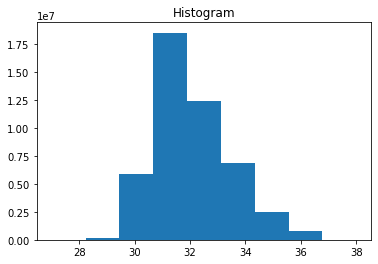

In [37]:
sig2s.where(ds.maskC[0]!=0.).plot(bins=np.linspace(27,38,10))

(array([2.6000000e+01, 4.9605000e+04, 9.7020800e+05, 3.1889820e+06,
        3.0430430e+06, 3.2312770e+06, 1.2396161e+07, 1.9137500e+05,
        0.0000000e+00]),
 array([27.        , 28.44444444, 29.88888889, 31.33333333, 32.77777778,
        34.22222222, 35.66666667, 37.11111111, 38.55555556, 40.        ]),
 <a list of 9 Patch objects>)

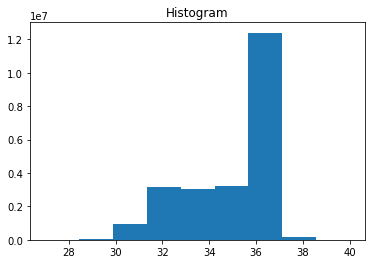

In [51]:
sig20.where(ds.maskC[0]!=0.).plot(bins=np.linspace(27,40,10))

In [68]:
# dr = np.arange(1,41, dtype='float')
# siglvl = 27. + np.array([0,1,2,3,
#                         3.5,4,4.5,5,5.5,6.,
#                         6.4,6.8,7.2,7.6,8.,
#                         8.2,8.4,8.6,8.8,9,
#                         9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10,
#                         10.1,10.2,10.3,10.4,10.5,10.6,10.7,10.8,10.9,11]
#                        )
siglvl = 27. + np.arange(0,11.1,0.1)
siglvl

array([27. , 27.1, 27.2, 27.3, 27.4, 27.5, 27.6, 27.7, 27.8, 27.9, 28. ,
       28.1, 28.2, 28.3, 28.4, 28.5, 28.6, 28.7, 28.8, 28.9, 29. , 29.1,
       29.2, 29.3, 29.4, 29.5, 29.6, 29.7, 29.8, 29.9, 30. , 30.1, 30.2,
       30.3, 30.4, 30.5, 30.6, 30.7, 30.8, 30.9, 31. , 31.1, 31.2, 31.3,
       31.4, 31.5, 31.6, 31.7, 31.8, 31.9, 32. , 32.1, 32.2, 32.3, 32.4,
       32.5, 32.6, 32.7, 32.8, 32.9, 33. , 33.1, 33.2, 33.3, 33.4, 33.5,
       33.6, 33.7, 33.8, 33.9, 34. , 34.1, 34.2, 34.3, 34.4, 34.5, 34.6,
       34.7, 34.8, 34.9, 35. , 35.1, 35.2, 35.3, 35.4, 35.5, 35.6, 35.7,
       35.8, 35.9, 36. , 36.1, 36.2, 36.3, 36.4, 36.5, 36.6, 36.7, 36.8,
       36.9, 37. , 37.1, 37.2, 37.3, 37.4, 37.5, 37.6, 37.7, 37.8, 37.9,
       38. ])

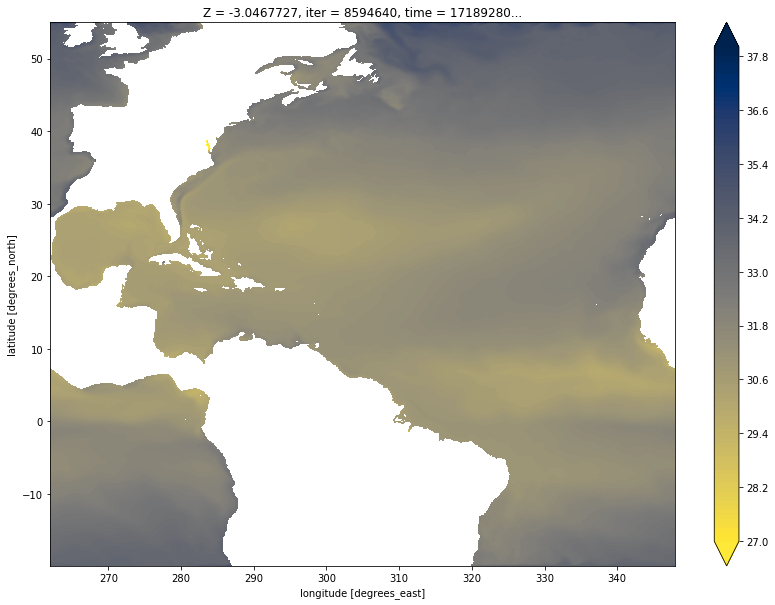

In [69]:
sig2s[36].where(ds.maskC[0]!=0.).plot.contourf(figsize=(14,10), 
                                               cmap='cividis_r', levels=siglvl, extend='both')

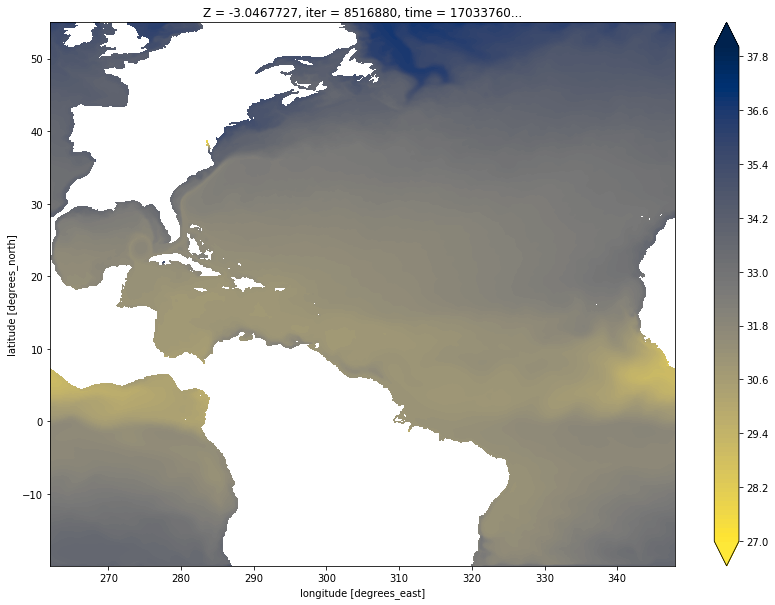

In [70]:
sig2s[0].where(ds.maskC[0]!=0.).plot.contourf(figsize=(14,10), 
                                              cmap='cividis_r', levels=siglvl, extend='both')

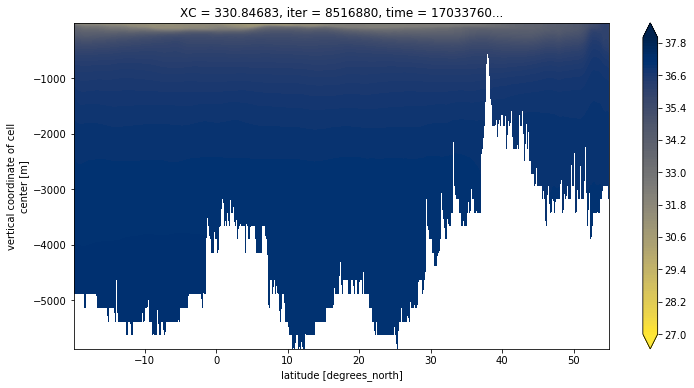

In [71]:
sig20[:,:,800].where(ds.maskC[:,:,800]!=0.).sel(Z=slice(0,-6e3)).plot.contourf(figsize=(12,6), 
                                                                               cmap='cividis_r', 
                                                                               levels=siglvl, extend='both')